In [25]:
% matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.animation as animation

from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [53]:
def init():
    global R,V,W,Rs,Vs,Ws,time
    R[:,:] = 0.0
    V[:,:] = 0.0
    W[:,:] = 0.0
    Rs[:,:,:] = 0.0
    Vs[:,:,:] = 0.0
    Ws[:,:,:] = 0.0
    time[:]
    
    title.set_text(r'')
    line.set_data([],[])
    line.set_3d_properties([])
    particles.set_data([],[])
    particles.set_3d_properties([])
    
    return particles, title, line

In [54]:
V1 = np.zeros([nump,dim])

def animate(i):
    global R,V,W,Rs,Vs,Ws,time
    time[i] = i*dt
    W = std*np.random.randn(dim, nump)

    #V = V*(1-zeta / m*dt) + W / m
    
    #V1 = V*(1-zeta/m*0.5*dt)+W/m
    #V = V-V1*zeta/m*dt+W/m

    V1 = V*(1-zeta/m*0.5*dt)+W/m/np.sqrt(2)
    V = V1*(1-zeta/m*dt)+W/m

    #V1 = V*(1-zeta/m*0.5*dt)
    #V = V-V1*zeta/m*dt+W/m
    
    #V1 = V*(1-zeta/m*0.5*dt)
    #V = V1*(1-zeta/m*dt)+W/m

    R = R + V*dt
    Rs[0:dim, 0:nump, i] = R
    Vs[0:dim, 0:nump, i] = V
    Ws[0:dim, 0:nump, i] = W
    
    title.set_text(r"t = " + str(time[i]))
    line.set_data(Rs[0,n,:i+1], Rs[1,n,:i+1])
    line.set_3d_properties(Rs[2,n,:i+1])
    particles.set_data(R[0:2,:])
    particles.set_3d_properties(R[2,:])
    
    return particles, title, line

In [55]:
dim = 3
nump = 1000 #number of particles
nums = 1024 #number of simulations steps
dt = .05 
zeta = .5 #friction constant
m = .5 #mass
kBT = .5 #temperature

std = np.sqrt(2*kBT*zeta*dt) #std for \Delta W eqn F11

np.random.seed(0)

R = np.zeros([dim,nump])
V = np.zeros([dim,nump])
W = np.zeros([dim,nump])
Rs = np.zeros([dim,nump,nums])
Vs = np.zeros([dim,nump,nums])
Ws = np.zeros([dim,nump,nums])

time = np.zeros([nums])

<IPython.core.display.Javascript object>


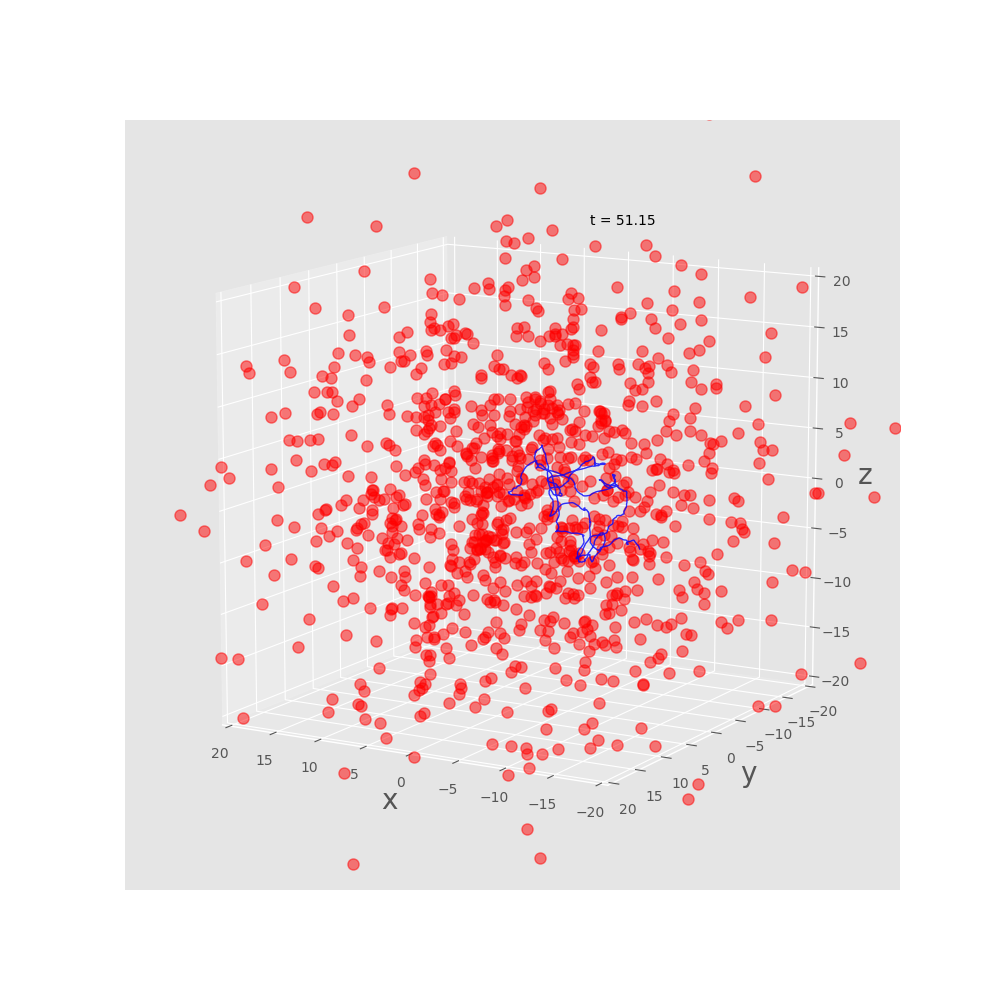

In [56]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel(r"x", fontsize=20)
ax.set_ylabel(r"y", fontsize=20)
ax.set_zlabel(r"z", fontsize=20)

box = 40
ax.set_xlim(-box/2, box/2)
ax.set_ylim(-box/2, box/2)
ax.set_zlim(-box/2, box/2)

ax.view_init(elev=12, azim=120)

particles, =  ax.plot([],[],[], 'ro', ms=8, alpha=.5)
title = ax.text(-180., 0., 250., r'', transform = ax.transAxes, va='center')
line, = ax.plot([],[],[], 'b', lw=1, alpha=.8)
n = 0

anim = animation.FuncAnimation(fig, func=animate, init_func=init, frames=nums, 
                               interval=5, blit=True, repeat=False)
